In [2]:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# DATA SET
df = pd.read_csv(r'C:\Users\ACER\OneDrive\Documents\coffee_work_data_100_people.csv')

# Extract columns as numpy arrays
person_ids = df['PersonID'].to_numpy()
coffee_cups = df['CoffeeCups'].to_numpy()
work_hours = df['WorkHours'].to_numpy()

# INITIALS
col_title = df.columns.tolist()
col_cat = ['Person ID', 'Coffee Cups Consumed', 'Work Hours']

# OUTPUTS
print("Coffee Intake and Work Duration Patterns\n")

print("Data set columns:")
for i in range(len(col_cat)):
    print(i + 1, col_cat[i], col_title[i])

# Proof of clean data set
print("\nOriginal Data Shape:", df.shape)
print("Missing Values:") 
print(df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())

# Print top 3 coffee drinkers
print("\nTop 3 Who Drinks The Most Coffee:\n", df.sort_values(by='CoffeeCups', ascending=False).head(3))

Coffee Intake and Work Duration Patterns

Data set columns:
1 Person ID PersonID
2 Coffee Cups Consumed CoffeeCups
3 Work Hours WorkHours

Original Data Shape: (100, 3)
Missing Values:
PersonID      0
CoffeeCups    0
WorkHours     0
dtype: int64

Unique Values per Column:
 PersonID      100
CoffeeCups     13
WorkHours      10
dtype: int64

Top 3 Who Drinks The Most Coffee:
     PersonID  CoffeeCups  WorkHours
5          6          14         12
43        44          14         11
24        25          13         11


In [3]:
# numpy operations on coffee and work data

sum_coffee = np.sum(coffee_cups)
max_coffee = np.max(coffee_cups)
min_coffee = np.min(coffee_cups)

mean_work = np.mean(work_hours)
median_work = np.median(work_hours)
perc_work = np.percentile(work_hours, [90, 95, 99])

std_coffee = np.std(coffee_cups)
var_coffee = np.var(coffee_cups)
range_coffee = np.ptp(coffee_cups)

print("\nCoffee Cups Statistics:")
print(f"Sum of Coffee Cups: {sum_coffee}")
print(f"Maximum Coffee Cups: {max_coffee}")
print(f"Minimum Coffee Cups: {min_coffee}")

print("\nWork Hours Statistics:")
print(f"Mean Work Hours: {mean_work:.1f}")
print(f"Median Work Hours: {median_work:.1f}")
print(f"90th, 95th, and 99th Percentiles of Work Hours: {perc_work}")

print("\nCoffee Cups Dispersion:")
print(f"Standard Deviation of Coffee Cups: {std_coffee:.1f}")
print(f"Variance of Coffee Cups: {var_coffee:.1f}")
print(f"Range of Coffee Cups: {range_coffee}")


Coffee Cups Statistics:
Sum of Coffee Cups: 793
Maximum Coffee Cups: 14
Minimum Coffee Cups: 2

Work Hours Statistics:
Mean Work Hours: 7.9
Median Work Hours: 8.0
90th, 95th, and 99th Percentiles of Work Hours: [12. 12. 12.]

Coffee Cups Dispersion:
Standard Deviation of Coffee Cups: 3.1
Variance of Coffee Cups: 9.6
Range of Coffee Cups: 12


Array 1 [ 8.  6. 11.  6. 10.] 
Array 2 [14.  5.  7. 10.  7.] 
Array 3 [ 6. 11.  9.  4.  8.] 
Array 4 [ 6.  4. 10. 11.  3.]

One-Way ANOVA 

F-statistic: 0.3271, P-value: 0.80578151


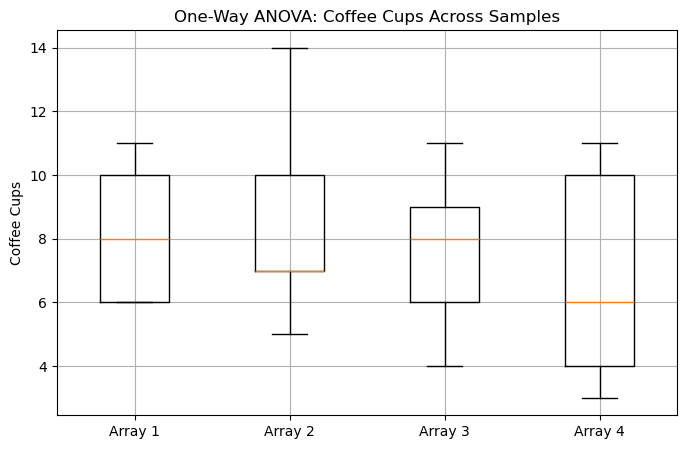


Z-Distribution

Z-score for first 5 coffee cup values:
-0.09805806756909166 -1.0786387432600117 1.3728129459672884 -1.0786387432600117 0.8825226081218285 

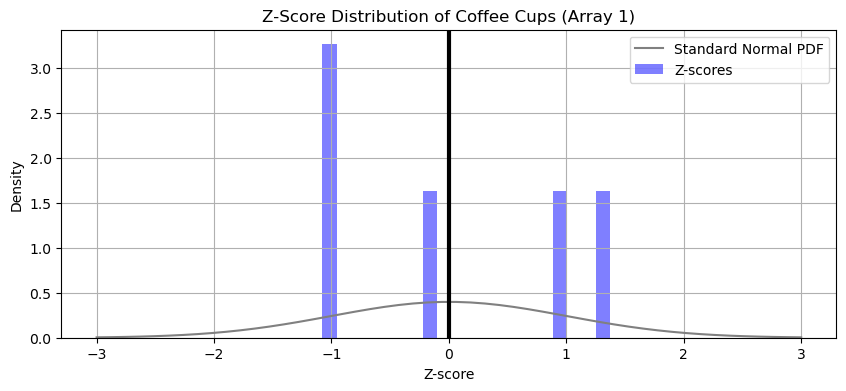


T-Test

T-test between Array 3 and Array 4 Coffee Cups: 
t = 0.40 
p = 0.700


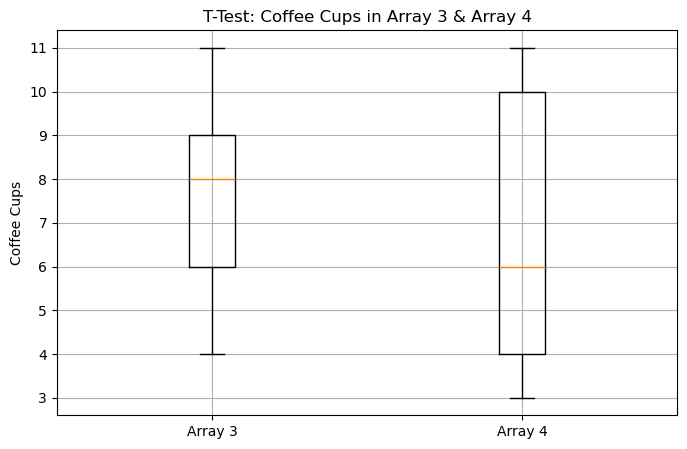

In [4]:
# Sampling the coffee cups data into 4 arrays (samples) with 5 values each
arr1 = np.array([])
arr2 = np.array([])
arr3 = np.array([])
arr4 = np.array([])

for i in range(20):
    if i < 5:
        arr1 = np.append(arr1, coffee_cups[i])
    elif i < 10:
        arr2 = np.append(arr2, coffee_cups[i])
    elif i < 15:
        arr3 = np.append(arr3, coffee_cups[i])
    else:
        arr4 = np.append(arr4, coffee_cups[i])

print("Array 1", arr1, "\nArray 2", arr2, "\nArray 3", arr3, "\nArray 4", arr4)

# One-way ANOVA test
f_statistic, p_value = stats.f_oneway(arr1, arr2, arr3, arr4)
print(f"\nOne-Way ANOVA \n\nF-statistic: {f_statistic:.4f}, P-value: {p_value:.8f}")

# Boxplot for ANOVA groups
data = [arr1, arr2, arr3, arr4]
labels = ['Array 1', 'Array 2', 'Array 3', 'Array 4']

plt.figure(figsize=(8, 5))
plt.boxplot(data, tick_labels=labels)  
plt.title('One-Way ANOVA: Coffee Cups Across Samples')
plt.ylabel('Coffee Cups')
plt.grid(True)
plt.show()

# Standard normal distribution (z-scores) of first sample (arr1)
zval = stats.zscore(arr1)
print(f"\nZ-Distribution\n\nZ-score for first 5 coffee cup values:")
for i in range(5):
    print(zval[i], end=' ')

# Plot z-score distribution
z_range = np.linspace(-3, 3, 50)
pdf = stats.norm.pdf(z_range)

plt.figure(figsize=(10, 4))
plt.plot(z_range, pdf, color='gray', linestyle='-', label='Standard Normal PDF')
plt.hist(zval, bins=20, density=True, alpha=0.5, label='Z-scores', color='blue')
plt.axvline(0, color='black', linestyle='-', linewidth=3)
plt.title('Z-Score Distribution of Coffee Cups (Array 1)')
plt.xlabel('Z-score')
plt.ylabel('Density')
plt.legend()
plt.grid(True)
plt.show()

# T-test between Array 3 and Array 4
t_stat, p_value = stats.ttest_ind(arr3, arr4)
print(f"\nT-Test\n\nT-test between Array 3 and Array 4 Coffee Cups: \nt = {t_stat:.2f} \np = {p_value:.3f}")

# Boxplot for T-test groups
plt.figure(figsize=(8, 5))
plt.boxplot([arr3, arr4], tick_labels=['Array 3', 'Array 4'])
plt.title('T-Test: Coffee Cups in Array 3 & Array 4')
plt.ylabel('Coffee Cups')
plt.grid(True)
plt.show()

In [5]:
# Set up the independent and dependent variables
x = sm.add_constant(df['CoffeeCups'])  
y = df['WorkHours']  

# Fit the linear regression model
model = sm.OLS(y, x).fit()

# Print the regression summary
print("\nLinear Regression Summary:")
print(model.summary())


Linear Regression Summary:
                            OLS Regression Results                            
Dep. Variable:              WorkHours   R-squared:                       0.888
Model:                            OLS   Adj. R-squared:                  0.887
Method:                 Least Squares   F-statistic:                     777.2
Date:                Wed, 28 May 2025   Prob (F-statistic):           2.18e-48
Time:                        14:14:11   Log-Likelihood:                -137.39
No. Observations:                 100   AIC:                             278.8
Df Residuals:                      98   BIC:                             284.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          1.0214   

CoffeeCups vs WorkHours
Correlation coefficient (Pearson r): 0.9423497082321958


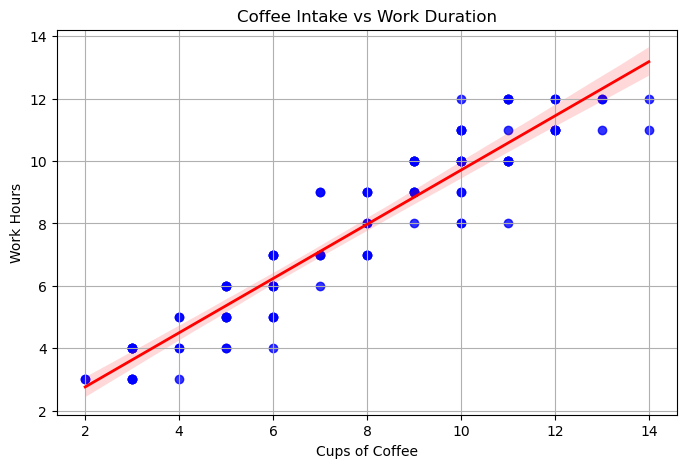

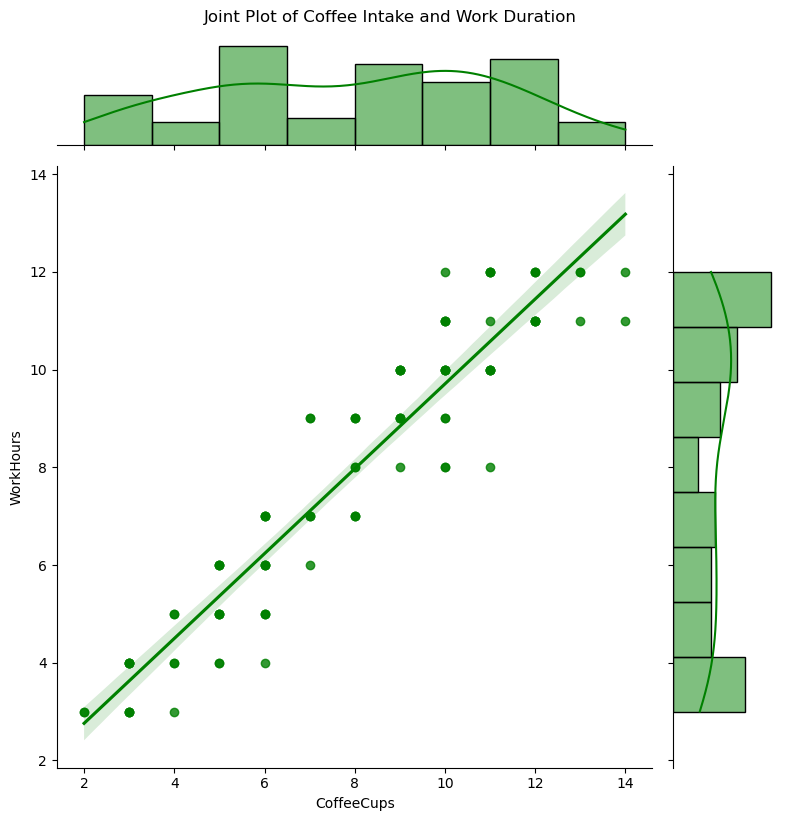

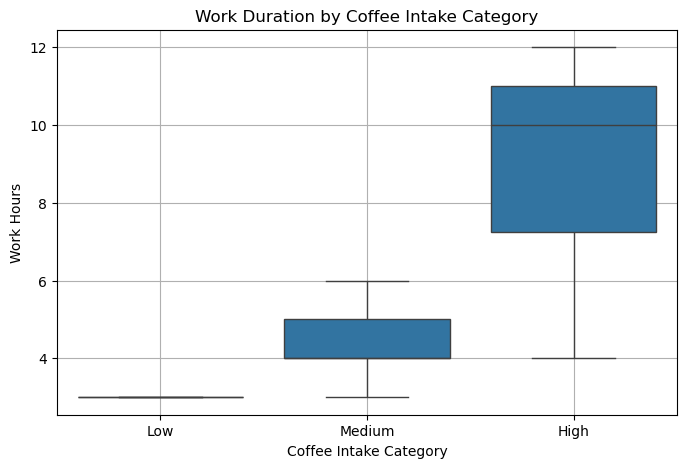

In [6]:
# Correlation and Visualization between Coffee Intake and Work Duration

# Calculate correlation coefficient
corr_matrix = np.corrcoef(coffee_cups, work_hours)
correlation = corr_matrix[0, 1]

print("CoffeeCups vs WorkHours")
print("Correlation coefficient (Pearson r):", correlation)

# Create DataFrame for plotting
ds = pd.DataFrame({'CoffeeCups': coffee_cups, 'WorkHours': work_hours})

# 1. Scatter Plot with Regression Line
plt.figure(figsize=(8, 5))
sns.regplot(x='CoffeeCups', y='WorkHours', data=ds, color='blue', marker='o',
            ci=95, line_kws={'color': 'red', 'linewidth': 2})
plt.title('Coffee Intake vs Work Duration')
plt.xlabel('Cups of Coffee')
plt.ylabel('Work Hours')
plt.grid(True)
plt.show()

# 2. Joint Plot with Histogram & Regression
sns.jointplot(x='CoffeeCups', y='WorkHours', data=ds, kind='reg', height=8, color='green')
plt.suptitle('Joint Plot of Coffee Intake and Work Duration', y=1.02)
plt.show()

# 3. Boxplot Grouped by Coffee Intake Categories
bins = [0, 2, 5, coffee_cups.max()]
labels = ['Low', 'Medium', 'High']
df['CoffeeCategory'] = pd.cut(df['CoffeeCups'], bins=bins, labels=labels, include_lowest=True)

plt.figure(figsize=(8,5))
sns.boxplot(x='CoffeeCategory', y='WorkHours', data=df)
plt.title('Work Duration by Coffee Intake Category')
plt.xlabel('Coffee Intake Category')
plt.ylabel('Work Hours')
plt.grid(True)
plt.show()

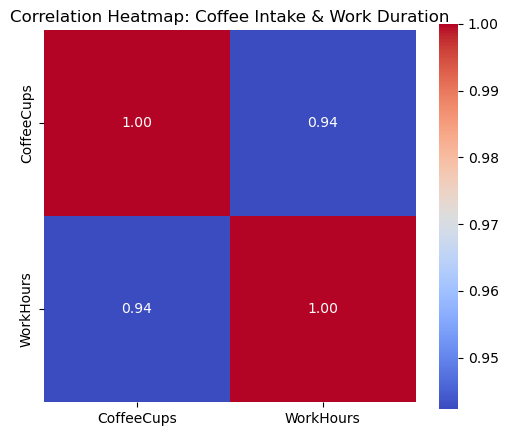

In [7]:
# Prepare DataFrame with variables
dx = pd.DataFrame({'CoffeeCups': coffee_cups, 'WorkHours': work_hours})

# Calculate correlation matrix
corr = dx.corr()

# Plot heatmap of correlations
plt.figure(figsize=(6, 5))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt='.2f', square=True)
plt.title('Correlation Heatmap: Coffee Intake & Work Duration')
plt.show()

In [8]:
%history -n 1-513

   1: %history -n 1-513
   2:
import pandas as pd
import numpy as np
from scipy import stats
import statsmodels.api as sm
import matplotlib.pyplot as plt
import seaborn as sns

# DATA SET
df = pd.read_csv(r'C:\Users\ACER\OneDrive\Documents\coffee_work_data_100_people.csv')

# Extract columns as numpy arrays
person_ids = df['PersonID'].to_numpy()
coffee_cups = df['CoffeeCups'].to_numpy()
work_hours = df['WorkHours'].to_numpy()

# INITIALS
col_title = df.columns.tolist()
col_cat = ['Person ID', 'Coffee Cups Consumed', 'Work Hours']

# OUTPUTS
print("Coffee Intake and Work Duration Patterns\n")

print("Data set columns:")
for i in range(len(col_cat)):
    print(i + 1, col_cat[i], col_title[i])

# Proof of clean data set
print("\nOriginal Data Shape:", df.shape)
print("Missing Values:") 
print(df.isnull().sum())
print("\nUnique Values per Column:\n", df.nunique())

# Print top 3 coffee drinkers
print("\nTop 3 Who Drinks The Most Coffee:\n", df.sort_values(by='CoffeeCups', ascending=False).